<a href="https://www.kaggle.com/code/m000sey/saving-bees-w-eda-and-plotly?scriptVersionId=153911208" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🍯🍯🍯🍯🍯

In [1]:
# Import the libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
print("Libraries imported...")

Libraries imported...


In [2]:
# load the data
PATH = '/kaggle/input/save-the-honey-bees/'
df = pd.read_csv(os.path.join(PATH,f'save_the_bees.csv'))

# Create a usable time feature
df['year'] = df['year'].astype(str)
df['quarter'] = df['quarter'].astype(str)
df['time'] = df['year'] + '-' + df['quarter']

# Rename a column
df.rename(columns={'other_pests_and_parasites': 'other_pests'}, inplace=True)
print("data loaded...")

data loaded...


# EDA for the Bees

- I made some custom functions, so if you want to take a look at another state go for it! Just make sure the state you're looking for is in the list of unique states.

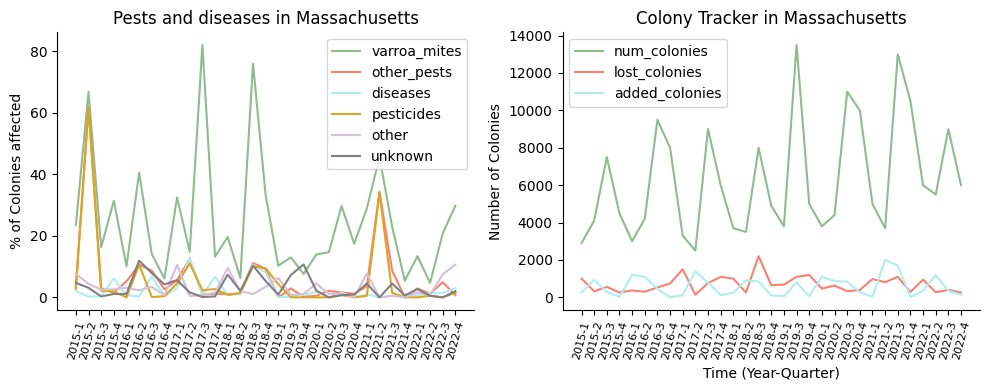

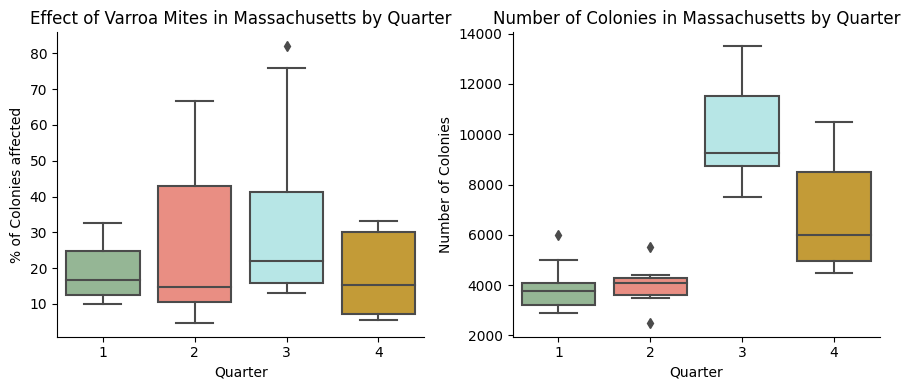

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

class BeeDataVisualizer:
    def __init__(self, df):
        self.df = df

    def line_plots(self, state):
        columns_to_plot_pest = ['varroa_mites', 'other_pests', 'diseases', 'pesticides', 'other', 'unknown']
        columns_to_plot_colony = ['num_colonies', 'lost_colonies', 'added_colonies']
        custom_palette = ['darkseagreen', 'salmon', 'paleturquoise', 'goldenrod', 'thistle', 'gray']

        df_state = self.df[self.df['state'] == state]

        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, sharex=True)

        # Plot pests and diseases
        for i, column in enumerate(columns_to_plot_pest):
            axes[0].plot(df_state['time'], df_state[column], linestyle='-', color=custom_palette[i], label=column)

        axes[0].set_title(f'Pests and diseases in {state}', fontname='Arial')
        axes[0].set_ylabel('% of Colonies affected', fontname='Arial')
        axes[0].legend()
        axes[0].grid(False)
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['right'].set_visible(False)
        axes[0].tick_params(axis='x', rotation=75, labelsize=8) 

        # Plot colony tracker
        for i, column in enumerate(columns_to_plot_colony):
            axes[1].plot(df_state['time'], df_state[column], linestyle='-', color=custom_palette[i], label=column)

        axes[1].set_title(f'Colony Tracker in {state}', fontname='Arial')
        axes[1].set_xlabel('Time (Year-Quarter)', fontname='Arial')
        axes[1].set_ylabel('Number of Colonies', fontname='Arial')
        axes[1].legend()
        axes[1].grid(False)
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)
        axes[1].tick_params(axis='x', rotation=75, labelsize=8) 

        # Adjust layout and show the plots
        plt.tight_layout()
        sns.despine()
        plt.show()

    def box_plots(self, state):
        # Filter rows where state is the specified state
        df_state = self.df[self.df['state'] == state]
        custom_palette = ['darkseagreen', 'salmon', 'paleturquoise', 'goldenrod', 'thistle', 'gray']

        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(9, 4), dpi=100)

        # Create a boxplot for 'varroa_mites'
        sns.boxplot(x='quarter', y='varroa_mites', data=df_state, palette=custom_palette, ax=axes[0])
        axes[0].set_title(f'Effect of Varroa Mites in {state} by Quarter')
        axes[0].set_xlabel('Quarter')
        axes[0].set_ylabel('% of Colonies affected')
        axes[0].grid(False)
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['right'].set_visible(False)

        # Create a boxplot for 'num_colonies'
        sns.boxplot(x='quarter', y='num_colonies', data=df_state, palette=custom_palette, ax=axes[1])
        axes[1].set_title(f'Number of Colonies in {state} by Quarter')
        axes[1].set_xlabel('Quarter')
        axes[1].set_ylabel('Number of Colonies')
        axes[1].grid(False)
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)

        # Adjust layout and show the plots
        plt.tight_layout()
        plt.show()

visualizer = BeeDataVisualizer(df)

visualizer.line_plots('Massachusetts')
visualizer.box_plots('Massachusetts')

# 🍯 Insights to stir the honey pot 🍯
- I made some cool functions that let's you take a closer look at certain Honey bee trends depending on their state
- I've noticed a couple of things so far:
    1. Mites seem to affect the bee colonies the most out of any noxious effector
    2. Depending on the state, colony numbers definitely change depending on the quarter. In Massachusetts, for instance, the honey bee population sky rockets in Q3, and is much less in Q1 and Q4 (winter). This makes obvious intuative sense. Whereas in sunny states, like Alabama, there're less seasonal trends. However, I bet in some states, the heat might be too much in summer months. Also, Bee biology could just have natural cycles.
    3. Mite trends seem very cyclical in some wintering states like Maine. I bet the frost isn't so great for the mites. Or, what could be happening, is that when bee numbers go down, there're less colonies for them to affect. 

# Using plotly to save the bees

In [4]:
### Usingly plotly to look at the all States with different sorts of data

# Shout out to @pluspin for helping me display my dropdown. This is like bees in a colony doing a waggle dance to give others directions

# Dropdown widget
dropdown_widget = widgets.Dropdown(
    options=[col for col in df.columns if col not in ['time', 'state', 'state_code', 'year', 'quarter']], 
    description='Select Data:')

# TimeSelector widget
timeselector_widget = widgets.SelectionSlider(
        options=df['time'].unique().tolist(),
        value=df['time'].min(),
        description='Select Time:',
        style={'description_width': 'initial'}, 
        layout={'width': '80%'})

def update_plot(selected_data, selected_time):
    filtered_df = df[df['time'] == selected_time]
    fig = px.choropleth(
        filtered_df,
        locations='state_code',
        locationmode="USA-states",
        color=selected_data,
        color_continuous_scale="Viridis_r",
        scope="usa",
        animation_frame='time')
    fig.show() 

interactive_widget = widgets.interactive(
    update_plot,
    selected_data=dropdown_widget,
    selected_time=timeselector_widget)

display(interactive_widget)

interactive(children=(Dropdown(description='Select Data:', options=('num_colonies', 'max_colonies', 'lost_colo…